In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC as svc
from sklearn.svm import LinearSVC as Lsvc
from sklearn.metrics import classification_report
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score,  confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Dataset 

In [277]:
col=['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive',      
'word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your',         
'word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab',          
'word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999',         
'word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu',          
'word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','label']
len(col)

58

In [278]:
q1_df = pd.read_csv('spambase.data', names=col)
q1_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [279]:
q1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [280]:
q1_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


## Scaling

In [281]:
from sklearn.preprocessing import StandardScaler
# q1_df = StandardScaler().fit_transform(q1_df)
for i in q1_df.columns[:-1]:
  q1_df[i] = StandardScaler().fit_transform(np.array(q1_df[i]).reshape(-1,1))
q1_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724,1
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,...,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324,1
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,...,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733,1
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.672880,-0.165072,0.673183,-0.0469,-0.464314,0.781971,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,0.343917,-0.155198,-0.329912,-0.308355,-0.103048,-0.127640,-0.252336,-0.322110,0
4597,-0.342434,-0.165072,-0.556761,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.514307,-0.155198,0.102907,-0.308355,-0.103048,-0.114623,-0.247205,-0.444165,0
4598,0.640128,-0.165072,0.038373,-0.0469,-0.464314,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,0.260533,2.141746,-0.155198,-0.329912,-0.308355,-0.103048,-0.119382,-0.236941,-0.272628,0
4599,2.801763,-0.165072,-0.556761,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.303450,-0.155198,-0.329912,-0.308355,-0.103048,-0.127483,-0.242073,-0.338604,0


## Train-Test Split

In [282]:
from sklearn.model_selection import train_test_split
X = q1_df.iloc[:,:-1].values
Y = q1_df.iloc[:,-1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=29)
print(len(X_train), len(Y_train), len(X_test), len(Y_test))

3220 3220 1381 1381


## Using the three kernels

In [283]:
lin_svc = svc(kernel='linear').fit(X_train, Y_train)
quad_svc = svc(kernel='poly', degree=2).fit(X_train, Y_train)
rbf_svc = svc(kernel='rbf').fit(X_train, Y_train)

Linear SVC

In [284]:
pred_lin = lin_svc.predict(X_test)
pred_lin

array([1, 1, 0, ..., 0, 0, 0])

In [285]:
print("Accuracy :", 100*accuracy_score(Y_test, pred_lin))
print(classification_report(Y_test, pred_lin))

Accuracy : 93.48298334540188
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       822
           1       0.94      0.90      0.92       559

    accuracy                           0.93      1381
   macro avg       0.94      0.93      0.93      1381
weighted avg       0.93      0.93      0.93      1381



In [286]:
fig = px.density_heatmap(x=Y_test, y=pred_lin, labels={'x': 'groundtruth','y': 'prediction'})
fig.add_shape(
              type='line', line=dict(dash='dash'),
            x0 = pred_lin.min(), y0 = pred_lin.min(),
            x1 = pred_lin.max(), y1 = pred_lin.max()
)
fig.show()

Quadratic SVC

In [287]:
pred_quad = quad_svc.predict(X_test)
pred_quad

array([1, 1, 0, ..., 0, 0, 0])

In [288]:
print("Accuracy :", 100*accuracy_score(Y_test, pred_quad))
print(classification_report(Y_test, pred_quad))

Accuracy : 83.7798696596669
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       822
           1       0.95      0.63      0.76       559

    accuracy                           0.84      1381
   macro avg       0.87      0.81      0.82      1381
weighted avg       0.86      0.84      0.83      1381



RBF SVC

In [289]:
pred_rbf = rbf_svc.predict(X_test)
pred_rbf

array([1, 1, 0, ..., 0, 0, 0])

In [290]:
print("Accuracy :", 100*accuracy_score(Y_test, pred_rbf))
print(classification_report(Y_test, pred_rbf))

Accuracy : 92.97610427226647
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       822
           1       0.94      0.88      0.91       559

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.93      1381
weighted avg       0.93      0.93      0.93      1381



## Changing values of C

Linear SVC

In [291]:
lin_svc_c_train_acc = []
lin_svc_c_test_acc = []
C = [i/100 for i in range(25,2500,25)]
for i in C:
  lin_svc_c = svc(kernel='linear', C=i, random_state=1).fit(X_train, Y_train)
  # lin_svc_c = Lsvc(C=i, random_state=1).fit(X_train, Y_train)
  pred_lin_c_train = lin_svc_c.predict(X_train)
  pred_lin_c_test = lin_svc_c.predict(X_test)
  
  cm_train = confusion_matrix(Y_train, pred_lin_c_train)
  acc_train = float(cm_train.diagonal().sum()/len(Y_train))

  cm_test = confusion_matrix(Y_test, pred_lin_c_test)
  acc_test = float(cm_test.diagonal().sum()/len(Y_test))

  lin_svc_c_train_acc.append(acc_train)
  lin_svc_c_test_acc.append(acc_test)
  print(i,":\t", acc_train, "\t", acc_test)
  # print(i,":",accuracy_score(Y_train, pred_lin_c_train), accuracy_score(Y_test, pred_lin_c_test))

0.25 :	 0.9354037267080745 	 0.9312092686459088
0.5 :	 0.9357142857142857 	 0.9333816075307748
0.75 :	 0.9350931677018633 	 0.9333816075307748
1.0 :	 0.9350931677018633 	 0.9348298334540188
1.25 :	 0.9357142857142857 	 0.9341057204923968
1.5 :	 0.9357142857142857 	 0.9341057204923968
1.75 :	 0.9363354037267081 	 0.9348298334540188
2.0 :	 0.9375776397515528 	 0.9355539464156408
2.25 :	 0.9372670807453416 	 0.9348298334540188
2.5 :	 0.9369565217391305 	 0.9333816075307748
2.75 :	 0.9372670807453416 	 0.9348298334540188
3.0 :	 0.9375776397515528 	 0.9355539464156408
3.25 :	 0.9366459627329192 	 0.9355539464156408
3.5 :	 0.9369565217391305 	 0.9355539464156408
3.75 :	 0.9372670807453416 	 0.9348298334540188
4.0 :	 0.9369565217391305 	 0.9348298334540188
4.25 :	 0.9366459627329192 	 0.9348298334540188
4.5 :	 0.9363354037267081 	 0.9333816075307748
4.75 :	 0.9360248447204969 	 0.9333816075307748
5.0 :	 0.9360248447204969 	 0.9341057204923968
5.25 :	 0.9363354037267081 	 0.9348298334540188
5.

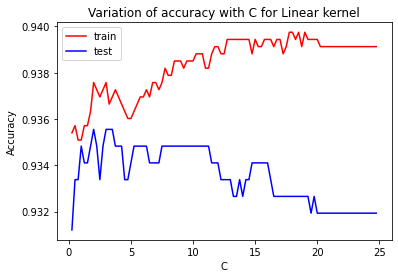

In [292]:
plt.plot(C, lin_svc_c_train_acc, label="train", color='red')
plt.plot(C, lin_svc_c_test_acc, label="test", color='blue')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Variation of accuracy with C for Linear kernel')
plt.show()

In [295]:
df_lin = pd.DataFrame()
df_lin['C for Linear'] = C
df_lin['Train Accuracy'] = lin_svc_c_train_acc
df_lin['Test Accuracy'] = lin_svc_c_test_acc
df_lin

,C for Linear,Train Accuracy,Test Accuracy
0,0.25,0.935404,0.931209
1,0.50,0.935714,0.933382
2,0.75,0.935093,0.933382
3,1.00,0.935093,0.934830
4,1.25,0.935714,0.934106
...,...,...,...
94,23.75,0.939130,0.931933
95,24.00,0.939130,0.931933
96,24.25,0.939130,0.931933
97,24.50,0.939130,0.931933


In [296]:
# C = 10.5
lin_svc_c = svc(kernel='linear', C=10.5, random_state=1).fit(X_train, Y_train)
pred_lin_c_train = lin_svc_c.predict(X_train)
pred_lin_c_test = lin_svc_c.predict(X_test)

print("TRAINING SET")
cm_train = confusion_matrix(Y_train, pred_lin_c_train)
print(cm_train)
acc_train = float(cm_train.diagonal().sum()/len(Y_train))
print("Accuracy :",100*acc_train)

print("-------------------------------")

print("TESTING SET")
cm_test = confusion_matrix(Y_test, pred_lin_c_test)
print(cm_test)
acc_test = float(cm_test.diagonal().sum()/len(Y_test))
print("Accuracy :",100*acc_test)

TRAINING SET
[[1886   80]
 [ 117 1137]]
Accuracy : 93.88198757763975
-------------------------------
TESTING SET
[[792  30]
 [ 60 499]]
Accuracy : 93.48298334540188


Quadratic SVC

In [297]:
quad_svc_c_train_acc = []
quad_svc_c_test_acc = []
for i in range(1,250):
  quad_svc_c = svc(kernel='poly', degree=2, C=i).fit(X_train, Y_train)
  pred_quad_c_train = quad_svc_c.predict(X_train)
  pred_quad_c_test = quad_svc_c.predict(X_test)

  cm_train = confusion_matrix(Y_train, pred_quad_c_train)
  acc_train = float(cm_train.diagonal().sum()/len(Y_train))

  cm_test = confusion_matrix(Y_test, pred_quad_c_test)
  acc_test = float(cm_test.diagonal().sum()/len(Y_test))

  quad_svc_c_train_acc.append(acc_train)
  quad_svc_c_test_acc.append(acc_test)
  print(i,":\t", acc_train, "\t", acc_test)
  # print(i,":",accuracy_score(Y_train, pred_quad_c_train), accuracy_score(Y_test, pred_quad_c_test))

1 :	 0.8518633540372671 	 0.8377986965966691
2 :	 0.8888198757763975 	 0.8689355539464156
3 :	 0.9108695652173913 	 0.88848660391021
4 :	 0.9263975155279504 	 0.9000724112961622
5 :	 0.9326086956521739 	 0.9022447501810282
6 :	 0.9372670807453416 	 0.9058653149891384
7 :	 0.9406832298136646 	 0.9087617668356264
8 :	 0.9456521739130435 	 0.9116582186821144
9 :	 0.9487577639751553 	 0.9123823316437364
10 :	 0.9509316770186336 	 0.9152787834902245
11 :	 0.9518633540372671 	 0.9152787834902245
12 :	 0.9531055900621118 	 0.9174511223750905
13 :	 0.953416149068323 	 0.9181752353367125
14 :	 0.9540372670807453 	 0.9188993482983345
15 :	 0.9540372670807453 	 0.9188993482983345
16 :	 0.9549689440993789 	 0.9196234612599565
17 :	 0.9565217391304348 	 0.9196234612599565
18 :	 0.9568322981366459 	 0.9203475742215785
19 :	 0.9571428571428572 	 0.9203475742215785
20 :	 0.9568322981366459 	 0.9196234612599565
21 :	 0.9577639751552796 	 0.9210716871832005
22 :	 0.9577639751552796 	 0.9203475742215785


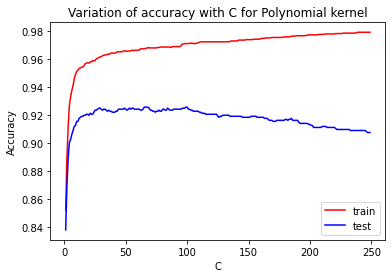

In [298]:
plt.plot(range(1,250), quad_svc_c_train_acc, label="train", color='red')
plt.plot(range(1,250), quad_svc_c_test_acc, label="test", color='blue')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Variation of accuracy with C for Polynomial kernel')
plt.show()

In [301]:
df_quad = pd.DataFrame()
df_quad['C for Quadratic'] = range(1,250)
df_quad['Train Accuracy'] = quad_svc_c_train_acc
df_quad['Test Accuracy'] = quad_svc_c_test_acc
df_quad

,C for Quadratic,Train Accuracy,Test Accuracy
0,1,0.851863,0.837799
1,2,0.888820,0.868936
2,3,0.910870,0.888487
3,4,0.926398,0.900072
4,5,0.932609,0.902245
...,...,...,...
244,245,0.978882,0.908762
245,246,0.978882,0.908038
246,247,0.978882,0.907314
247,248,0.978882,0.907314


In [302]:
quad_svc_c_test_acc1 = quad_svc_c_test_acc[::-1]

In [303]:
print(len(quad_svc_c_test_acc1)-quad_svc_c_test_acc1.index(max(quad_svc_c_test_acc))-2, 100*max(quad_svc_c_test_acc))

98 92.54163649529326


In [304]:
quad_svc_c_test_acc[99]*100

92.54163649529326

In [305]:
# C = 98
quad_svc_c = svc(kernel='poly', degree=2, C=98).fit(X_train, Y_train)
pred_quad_c_train = quad_svc_c.predict(X_train)
pred_quad_c_test = quad_svc_c.predict(X_test)

print("TRAINING SET")
cm_train = confusion_matrix(Y_train, pred_quad_c_train)
print(cm_train)
acc_train = float(cm_train.diagonal().sum()/len(Y_train))
print("Accuracy :",100*acc_train)

print("-------------------------------")

print("TESTING SET")
cm_test = confusion_matrix(Y_test, pred_quad_c_test)
print(cm_test)
acc_test = float(cm_test.diagonal().sum()/len(Y_test))
print("Accuracy :",100*acc_test)

TRAINING SET
[[1950   16]
 [  78 1176]]
Accuracy : 97.0807453416149
-------------------------------
TESTING SET
[[783  39]
 [ 65 494]]
Accuracy : 92.46922519913106


RBF SVC

In [306]:
rbf_svc_c_train_acc = []
rbf_svc_c_test_acc = []
for i in range(1,250):
  rbf_svc_c = svc(kernel='rbf', C=i).fit(X_train, Y_train)
  pred_rbf_c_train = rbf_svc_c.predict(X_train)
  pred_rbf_c_test = rbf_svc_c.predict(X_test)

  cm_train = confusion_matrix(Y_train, pred_rbf_c_train)
  acc_train = float(cm_train.diagonal().sum()/len(Y_train))

  cm_test = confusion_matrix(Y_test, pred_rbf_c_test)
  acc_test = float(cm_test.diagonal().sum()/len(Y_test))

  rbf_svc_c_train_acc.append(acc_train)
  rbf_svc_c_test_acc.append(acc_test)
  print(i,":\t", acc_train, "\t", acc_test)
  # print(i,":",accuracy_score(Y_train, pred_rbf_c_train), accuracy_score(Y_test, pred_rbf_c_test))

1 :	 0.9475155279503106 	 0.9297610427226647
2 :	 0.9518633540372671 	 0.9297610427226647
3 :	 0.9552795031055901 	 0.9319333816075308
4 :	 0.9574534161490683 	 0.9348298334540188
5 :	 0.9596273291925466 	 0.9355539464156408
6 :	 0.9602484472049689 	 0.9355539464156408
7 :	 0.9618012422360248 	 0.9355539464156408
8 :	 0.9630434782608696 	 0.9355539464156408
9 :	 0.9633540372670808 	 0.9370021723388848
10 :	 0.9636645962732919 	 0.9377262853005068
11 :	 0.9645962732919254 	 0.9377262853005068
12 :	 0.9652173913043478 	 0.9384503982621288
13 :	 0.9661490683229814 	 0.9377262853005068
14 :	 0.9680124223602484 	 0.9384503982621288
15 :	 0.9686335403726708 	 0.939174511223751
16 :	 0.968944099378882 	 0.939174511223751
17 :	 0.9701863354037267 	 0.9384503982621288
18 :	 0.9704968944099379 	 0.9384503982621288
19 :	 0.9704968944099379 	 0.9377262853005068
20 :	 0.970807453416149 	 0.9377262853005068
21 :	 0.9711180124223603 	 0.9370021723388848
22 :	 0.9717391304347827 	 0.9370021723388848
2

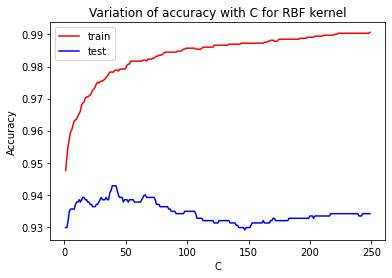

In [307]:
plt.plot(range(1,250), rbf_svc_c_train_acc, label="train", color='red')
plt.plot(range(1,250), rbf_svc_c_test_acc, label="test", color='blue')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Variation of accuracy with C for RBF kernel')
plt.show()

In [308]:
df_rbf = pd.DataFrame()
df_rbf['C for RBF'] = range(1,250)
df_rbf['Train Accuracy'] = rbf_svc_c_train_acc
df_rbf['Test Accuracy'] = rbf_svc_c_test_acc
df_rbf

,C for RBF,Train Accuracy,Test Accuracy
0,1,0.947516,0.929761
1,2,0.951863,0.929761
2,3,0.955280,0.931933
3,4,0.957453,0.934830
4,5,0.959627,0.935554
...,...,...,...
244,245,0.990373,0.934106
245,246,0.990373,0.934106
246,247,0.990373,0.934106
247,248,0.990373,0.934106


In [309]:
rbf_svc_c_test_acc1 = rbf_svc_c_test_acc[::-1]

In [310]:
print(len(rbf_svc_c_test_acc1)-rbf_svc_c_test_acc1.index(max(rbf_svc_c_test_acc))-2, 100*max(rbf_svc_c_test_acc))

40 94.27950760318609


In [311]:
# C = 40
rbf_svc_c = svc(kernel='rbf', C=40).fit(X_train, Y_train)
pred_rbf_c_train = rbf_svc_c.predict(X_train)
pred_rbf_c_test = rbf_svc_c.predict(X_test)

print("TRAINING SET")
cm_train = confusion_matrix(Y_train, pred_rbf_c_train)
print(cm_train)
acc_train = float(cm_train.diagonal().sum()/len(Y_train))
print("Accuracy :",100*acc_train)

print("-------------------------------")

print("TESTING SET")
cm_test = confusion_matrix(Y_test, pred_rbf_c_test)
print(cm_test)
acc_test = float(cm_test.diagonal().sum()/len(Y_test))
print("Accuracy :",100*acc_test)

TRAINING SET
[[1949   17]
 [  53 1201]]
Accuracy : 97.82608695652173
-------------------------------
TESTING SET
[[795  27]
 [ 52 507]]
Accuracy : 94.27950760318609
